In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mdata = pd.read_csv(r'movie.csv')

In [5]:
mdata.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
rdata = pd.read_csv(r'ratings.csv')

In [8]:
rdata.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
data = pd.merge(mdata , rdata , on = 'movieId' , how = 'inner')

data.shape

(96811, 6)

In [10]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [5]:
data.drop(['movieId' , 'userId' , 'timestamp'] , axis = 1, inplace = True)

In [27]:
data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [47]:
data = pd.pivot_table(data , index = ['title' , 'genres'] , aggfunc = 'mean')
data.reset_index(level = ['title' , 'genres'] , inplace = True)
data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


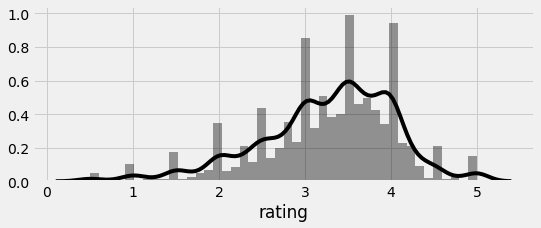

In [48]:
plt.rcParams['figure.figsize'] = (8 , 3)
plt.style.use('fivethirtyeight')
sns.distplot(data['rating'] , color = 'black')
plt.show()

In [50]:
data['y'] = data['title'].str.split(' ')
data['year'] = data['y'].apply(lambda x : x[-1])

data.drop(['y'] , axis =1 , inplace = True)

data['year'].value_counts()

(2002)    244
(1996)    240
(1995)    228
(2001)    227
(1998)    225
         ... 
(1902)      1
(1921)      1
(1922)      1
(1917)      1
            1
Name: year, Length: 103, dtype: int64

In [52]:
data['year'] = data['year'].str.strip('( )')

In [53]:
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [54]:
data['year'] = data['year'].replace(('2007-' , 'Despot' , 'Things' , '1975-1979' , 'Road' , '') ,
                                   ('2007' , '2016' , '2016' , '1979' , '2002' , '1996'))

data['year'] = data['year'].astype(int)

data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [80]:
data['t'] = data['title'].str.split(' ')
data['title'] = data['t'].apply(lambda x : ' '.join(x[:-1]))

In [83]:
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight,Drama|Musical,3.500000,1986
2,'Salem's Lot,Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You,Drama|Romance,4.000000,1997
4,"'burbs, The",Comedy,3.176471,1989


In [85]:
data[data['year'] == 2016][['title' , 'rating']].sort_values(by = 'rating' , ascending = False
                    ).head(10).reset_index(drop = True).style.background_gradient(cmap = 'Wistia')

,title,rating
0,Ice Age: The Great Egg-Scapade,5.000000
1,Piper,4.500000
2,Pride and Prejudice and Zombies,4.500000
3,Shin Godzilla,4.000000
4,Zootopia,3.890625
5,Sherlock: The Abominable Bride,3.850000
6,Deadpool,3.833333
7,The Nice Guys,3.833333
8,Sing Street,3.833333
9,10 Cloverfield Lane,3.678571


In [86]:
import ipywidgets
from ipywidgets import interact , interact_manual

In [97]:
@interact
def genre(Genre = ['Action' , 'Adventure' , 'Animation' , 'Children' , 'Comdey' , 'Crime' , 'Documnetary',
                  'Film-Noir' , 'Horror' , 'IMAX' , 'Musical'  ,'Mystery' , 'Romance' , 'Sci-Fi' , 'Thriller' , 'War'],
                  year = (1996 , 2016)):
    x = data.genres.str.split('|')
    d = data.drop(['genres'] , axis = 1)
    x = pd.concat([d , x] , axis = 1)
    x = x.explode('genres')
    x = x[(x.genres == Genre) & (x.year >= year)][['title' , 'rating' , 'year']].sort_values(by = 'rating',
        ascending = False).reset_index(drop = True).head(10)
    return x

interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Animation', 'Children', '…

In [98]:
x = data.genres.str.split('|')
d = data.drop(['genres'] , axis = 1)
x = pd.concat([d , x] , axis = 1)
x = x.explode('genres')
x

,title,rating,year,genres
0,'Hellboy': The Seeds of Creation,4.000000,2004,Action
0,'Hellboy': The Seeds of Creation,4.000000,2004,Adventure
0,'Hellboy': The Seeds of Creation,4.000000,2004,Comedy
0,'Hellboy': The Seeds of Creation,4.000000,2004,Documentary
0,'Hellboy': The Seeds of Creation,4.000000,2004,Fantasy
...,...,...,...,...
7069,xXx: State of the Union,2.000000,2005,Thriller
7070,¡Three Amigos!,3.134615,1986,Comedy
7070,¡Three Amigos!,3.134615,1986,Western
7071,À nous la liberté (Freedom for Us),1.000000,1931,Comedy


# TRANSACTIONAL ENCODER

In [101]:
from mlxtend.preprocessing import TransactionEncoder

In [114]:
genres = data.genres.str.split('|')

te = TransactionEncoder()

genres = te.fit_transform(genres)

genres = pd.DataFrame(genres , columns = te.columns_)

genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
genres = genres.astype('int')
genres.insert(0 , 'title' , data['title'])
genres.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,'Hellboy': The Seeds of Creation,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,'Round Midnight,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,'Salem's Lot,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,'Til There Was You,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,"'burbs, The",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
genres = genres.T
genres = genres.rename(columns = genres.iloc[0])
genres = genres.drop(genres.index[0])
genres = genres.astype(int)
genres

,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...And Justice for All,1-900 (06),...,Zoom,Zootopia,Zulu,Zulu,[REC],eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,0
Adventure,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Children,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Comedy,1,0,0,0,1,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,1
Crime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
Documentary,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drama,0,1,1,1,0,1,1,0,1,1,...,1,0,1,1,1,0,0,0,0,0
Fantasy,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [125]:
@interact
def recomdtn(movie = list(genres.columns)):
    similar_movies = genres.corrwith(genres[movie])
    similar_movies = similar_movies.sort_values(ascending = False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

interactive(children=(Dropdown(description='movie', options=("'Hellboy': The Seeds of Creation", "'Round Midni…

In [123]:
genres.corrwith(genres['Sing Street'])

'Hellboy': The Seeds of Creation     -0.132453
'Round Midnight                       0.688247
'Salem's Lot                          0.458831
'Til There Was You                    0.688247
'burbs, The                          -0.052632
                                        ...   
eXistenZ                             -0.096374
xXx                                  -0.096374
xXx: State of the Union              -0.096374
¡Three Amigos!                       -0.076472
À nous la liberté (Freedom for Us)   -0.076472
Length: 7072, dtype: float64

# CONTENT BASED

In [2]:
credits = pd.read_csv(r'D:\\PYTHON_OVERALL\\jupyter files\\tmdb_5000_credits.csv')

In [3]:
movies = pd.read_csv(r'D:\\PYTHON_OVERALL\\jupyter files\\tmdb_5000_movies.csv')

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
movies.rename(columns = {"id":"movie_id"} , inplace = True)

In [9]:
movies.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [11]:
data = credits.merge(movies , on = "movie_id")

In [12]:
data.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfv = TfidfVectorizer(min_df = 3 , max_features = None , strip_accents = 'unicode' , analyzer = 'word' ,
                    token_pattern = r'\w{1,}',
                     ngram_range= (1,3) , stop_words = 'english')

data['overview'] = data['overview'].fillna('')

In [18]:
tfv_matrix = tfv.fit_transform(data['overview'])

In [22]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [23]:
sig = sigmoid_kernel(tfv_matrix , tfv_matrix)

In [25]:
indices = pd.Series(data.index , index = data['original_title']).drop_duplicates()

In [35]:
def give_rec(title , sig = sig):
    idx = indices[title]
    
    sig_scores = list(enumerate(sig[idx]))
    
    sig_scores = sorted(sig_scores , key = lambda x : x[1] , reverse = True)
    
    # top 10 movies
    sig_scores = sig_scores[1:11]
    
    movie_indices = [i[0] for i in sig_scores]
    
    return data['original_title'].iloc[movie_indices]

In [31]:
list(enumerate(sig[indices['Avatar']]))

[(0, 0.7616344692549826),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.761595063615533),
 (4, 0.7615941559557649),
 (5, 0.7615952437887401),
 (6, 0.7615941559557649),
 (7, 0.7615957895326072),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615950265341389),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615956519417341),
 (27, 0.761596052213504),
 (28, 0.7615941559557649),
 (29, 0.76159517176877),
 (30, 0.7615941559557649),
 (31, 0.7615966149431749),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615978049286746),
 (37, 0.7615941

In [37]:
give_rec('Spy Kids')

1302    Spy Kids 2: The Island of Lost Dreams
1155                  Spy Kids 3-D: Game Over
1769      Spy Kids: All the Time in the World
4044                               Go for It!
3359                              In Too Deep
1631                                 Mr. 3000
1825                Jimmy Neutron: Boy Genius
339                           The Incredibles
3793                     The Velocity of Gary
1081                       Revolutionary Road
Name: original_title, dtype: object